In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

# train_labels = train["SalePrice"]
# train.drop("SalePrice", axis=1, inplace=True)

# train["Dataset"] = "train"
# test["Dataset"] = "test"

df = pd.concat([train, test], ignore_index=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(1309, 12)

### I. Handling Missing Data
Problem: Incomplete observations skew results.

Solutions:

* Deletion: Remove rows/columns with missing values.
* Use when: Missing data is random and <5% of dataset.
* Imputation: Fill missing values.
* Numerical: Mean/median
* Categorical: Mode (most frequent value)

In [8]:
((df.isnull().sum())*100)/1309

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Create a binary feature from 'Cabin'
df['HasCabin'] = df['Cabin'].notnull().astype(int)
test['Fare'].fillna(test['Fare'].median(), inplace=True)



C:\Users\micha\AppData\Local\Temp\ipykernel_7528\935960045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\micha\AppData\Local\Temp\ipykernel_7528\935960045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### II. Categorical Data Encoding
Problem: ML algorithms require numerical input.

Solutions:

* Label Encoding: Assign integers to categories.

    * Example: "Red"→0, "Blue"→1

Use for: Ordinal data (e.g., "Low" < "Medium" < "High").

* One-Hot Encoding:Create binary columns per category.

    * Example: "Color_Red"=[1,0], "Color_Blue"=[0,1]

Use for: Nominal data (no order).
         encoding features, not the target

In [10]:
{col: len(df[col].unique()) for col in df.columns}


{'PassengerId': 1309,
 'Survived': 3,
 'Pclass': 3,
 'Name': 1307,
 'Sex': 2,
 'Age': 98,
 'SibSp': 7,
 'Parch': 8,
 'Ticket': 929,
 'Fare': 282,
 'Cabin': 187,
 'Embarked': 3,
 'HasCabin': 2}

In [11]:
# Create `HasCabin` column (binary)
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Optional: Simplify rare titles
df['Title'] = df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
    'Sir', 'Jonkheer', 'Dona'
], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Label encode 'Sex' (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' (S, C, Q)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

#  One-hot encode 'Title'
df = pd.get_dummies(df, columns=['Title'], prefix='Title')

# Drop high-cardinality or unneeded features
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)


### III. Outlier Detection
Problem: Extreme values distort statistics. Solutions:

#### 1.IQR Method:

* Q1: 25th percentile → "Middle" of the first half.

* Q2: 50th percentile → Median of the full dataset.

* Q3: 75th percentile → "Middle" of the second half.

            IQR = Q3 - Q1
            Lower Bound = Q1 - 1.5 * IQR
            Upper Bound = Q3 + 1.5 * IQR 
IQR = Q3 - Q1: Used for outlier detection (e.g., in boxplots). image.png


#### 2.Z-score: 
* Flag values where 
    * z= x−μ / σ
    * Then, flag outliers where |z| > 3 


In [12]:
# Detect and remove outliers using IQR method before scaling
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')


**Iv. Feature Scaling**

**Problem:**

Features on different scales bias models (e.g., age vs. salary).

**Solutions:**

Min-Max Scaling: Rescale to [0, 1].

$$
x' = \frac{x-min(x)}{\text{max}(x)-min(x)}
$$


Standardization (Z-score): Center around mean (μ=0, σ=1).
$$
x' = \frac{x - \mu}{\sigma}
$$



In [13]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Show result
print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  HasCabin  \
0       0.0       3    0  0.372549      1      0  0.116975         0   
2       1.0       3    1  0.450980      0      0  0.127865         0   
3       1.0       1    1  0.627451      1      0  0.856739         1   
4       0.0       3    0  0.627451      0      0  0.129882         0   
5       0.0       3    0  0.490196      0      0  0.136470         0   

   Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0       False        True         False       False      True      False   
2       False        True         False        True     False      False   
3       False        True         False       False     False       True   
4       False        True         False       False      True      False   
5        True       False         False       False      True      False   

   Title_Rare  Title_the Countess  
0       False               False  
2       False               False  
3 

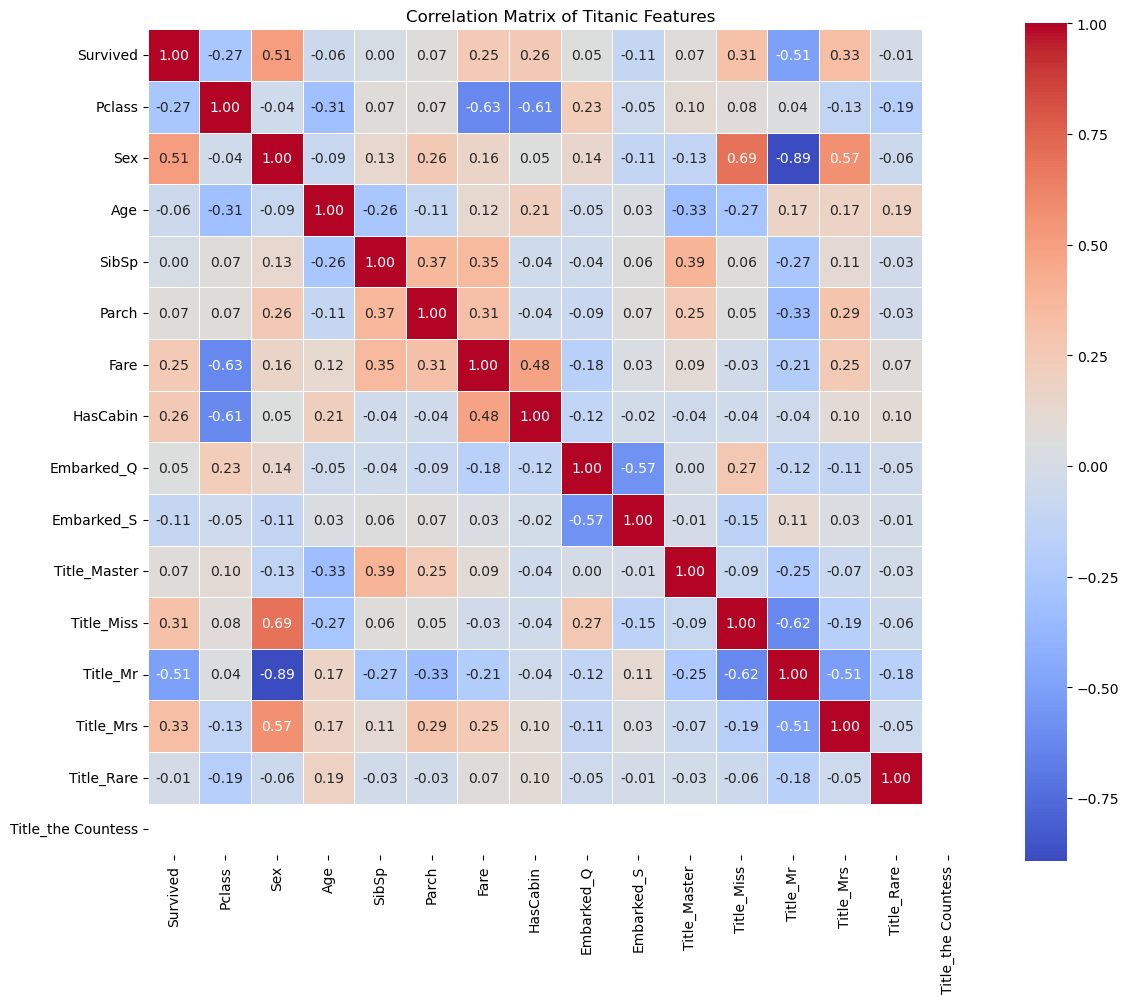

In [ ]:
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Titanic Features")
plt.tight_layout()
plt.show()


# **V. Train-Test Split**

**Problem:**
 Avoid overfitting by evaluating on unseen data.

**Solution:**

- Split data into training (70-80%) and testing (20-30%) sets.

- Stratified split preserves class ratios.

In [14]:
train_df = df[df['Survived'].notna()].copy()
test_df = df[df['Survived'].isna()].copy()


X = train_df.drop('Survived', axis=1)
y = train_df['Survived'].astype(int)  

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Final test set (for submission):", test_df.shape)


X_train shape: (574, 15)
X_val shape: (144, 15)
Final test set (for submission): (337, 16)


# **VI. Dimensionality Reduction (PCA)**
**Problem:**

High dimensions increase complexity.

**Solution:**
Project data onto principal components (eigenvectors of covariance matrix).


### **Principal Component Analysis (PCA) - Formulas**

#### **Step 1: Mean Centering the Data**

Let $X$ be your data matrix with $n$ samples and $p$ features. First, subtract the mean from each feature (mean centering):

$$
X_{\text{centered}} = X - \bar{X}
$$



#### **Step 2: Compute the Covariance Matrix**

$$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

* $\Sigma$: Covariance matrix
* $X_{\text{centered}}$: Mean-centered data



#### **Step 3: Eigen Decomposition**

Solve the eigenvalue problem:

$$
\Sigma v = \lambda v
$$

* $v$: Eigenvectors (principal components)
* $\lambda$: Eigenvalues (explained variance by each component)



#### **Step 4: Select Top $k$ Components**

Choose the top $k$ eigenvectors with the highest eigenvalues and form a matrix $W$:

$$
W = [v_1, v_2, \dots, v_k]
$$



#### **Step 5: Project the Data onto the New Feature Space**

$$
Z = X_{\text{centered}} \cdot W
$$

* $Z$: The transformed data in the principal component space



### **Final Formula**

$$
Z = (X - \bar{X}) \cdot W
$$




From the corelation matrix we can understand that PCA is not needed in this case because the dataset has relatively low dimensionality, meaning there's no issue with the curse of dimensionality. Additionally, the correlation matrix does not show any significant multicollinearity that would require dimensionality reduction. Tree-based models like Decision Trees or Random Forests, which are commonly used for the Titanic dataset, perform better without PCA since they can naturally handle correlated features and preserve the structure of the data. Moreover, applying PCA would result in a loss of interpretability—while original features like `Sex` or `Title_Mr` are easy to understand and relate to the problem, principal components like `PC1` or `PC2` are abstract combinations that obscure the meaning of the data.


PCA is berformed below because PCA might still be considered in a few specific scenarios. For example, if you are using models like logistic regression or support vector machines (SVM) and observe signs of overfitting, applying PCA could help reduce complexity and improve generalization. Additionally, PCA is useful for visualizing the data in two or three dimensions, which can help reveal patterns, clusters, or class separability that are not obvious in the original feature space.

In [ ]:
features = df.drop('Survived', axis=1, errors='ignore').columns
X = df[features]

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=df.index)

df_pca['Survived'] = df['Survived']

print("Explained variance ratio per component:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

train_df = df_pca[df_pca['Survived'].notna()].copy()
test_df = df_pca[df_pca['Survived'].isna()].copy()


X = train_df.drop('Survived', axis=1)
y = train_df['Survived'].astype(int)


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Final test set (for submission):", test_df.shape)
print(df_pca.head())

Explained variance ratio per component: [0.32127943 0.20214411 0.15859219 0.12603968 0.07143301 0.04596977
 0.02114904 0.01746952]
Total explained variance: 0.9640767492778867
X_train shape: (574, 8)
X_val shape: (144, 8)
Final test set (for submission): (337, 9)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.056221  0.672669  0.726998 -0.276739  0.251983  0.017269  0.045599   
2  0.000161  0.307578 -1.121413 -0.417471  0.640386 -0.445939  0.062944   
3  0.528485 -1.983986  0.042370 -0.669246  0.400294  0.695565  0.372970   
4 -0.629014  0.597639  0.203566  0.230500  0.263159  0.016844  0.052635   
5 -0.640895  0.739935 -0.140649 -0.092948 -0.967606  0.188418 -0.030934   

        PC8  Survived  
0 -0.071207       0.0  
2  0.059102       1.0  
3 -0.146253       1.0  
4 -0.043716       0.0  
5 -0.243020       0.0  
